In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random
import io
import folium
from numpy import random as np_random
from scipy.spatial import distance_matrix

In [4]:
df = pd.read_csv('data.csv')
df.head()

,City,Lattitude,Longitude
0,Islamabad,33.6989,73.0369
1,Lahore,31.5497,74.3436
2,Karachi,24.8600,67.0100
3,Peshawar,34.0000,71.5000
4,Hyderabad,25.3792,68.3683


In [5]:
#HERE I CALCULATE THE  min/max lang/lat values
values =(df.Longitude.min(), df.Lattitude.min(), df.Longitude.max(), df.Lattitude.max())

values


(66.975, 24.86, 74.3436, 34.0)

In [6]:
#HERE I USED FOLIUM TO CREATE A MAP WHICH PLACES THE VALUES IN THE DATASET ON THE MAP
x  = []
y = []
for i in range(8):
        x.append(np_random.uniform(24.86, 34.0, size=1))
        y.append(np_random.uniform(67.01,74.3436,size=1))

map = folium.Map(location=[df.Lattitude.mean(), df.Longitude.mean()], zoom_start=12,control_scale=True)
#folium place markers
for lat, lng, label in zip(df.Lattitude, df.Longitude, df.City):
    folium.Marker(location=[lat, lng], popup=label, marker_color='red').add_to(map)
map


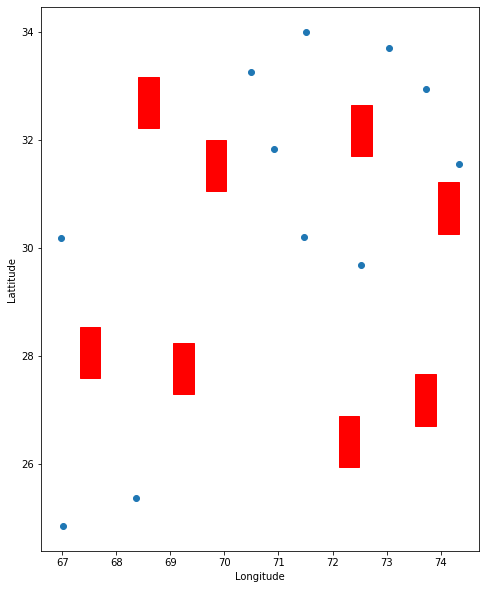

In [7]:
#THIS IS A BASIC PLOT OF THE POints
#plot the lang and lat
plt.figure(figsize=(10,10))
plt.scatter(df.Longitude, df.Lattitude)
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
#obs_4_x = [6.5, 8, 8, 6.5, 6.5]
#obs_4_y = [6, 6, 9.5, 9.5, 6]
#plt.fill(obs_4_x, obs_4_y, "r")


rectangle = plt.Rectangle((69.05499773,27.30419314), 0.38, 0.95, fc='red',ec="red")
#use y[1] and x[1] to get the coordinates of the rectangle
rectangle2 = plt.Rectangle((68.40579368,32.2244921), 0.38,0.95 , fc='red',ec="red")
#use y[2] and x[2] to get the coordinates of the rectangle
rectangle3 = plt.Rectangle((73.95673648,30.2707003), 0.38, 0.95, fc='red',ec="red")
#use y[3] and x[3] to get the coordinates of the rectangle
rectangle4 = plt.Rectangle((69.65336426,31.05971192), 0.38, 0.95, fc='red',ec="red")
#use y[4] and x[4] to get the coordinates of the rectangle
rectangle5 = plt.Rectangle((73.52528668,26.72029817), 0.38, 0.95, fc='red',ec="red")
#use y[5] and x[5] to get the coordinates of the rectangle
rectangle6 = plt.Rectangle((72.34731228,31.6979375), 0.38, 0.95, fc='red',ec="red")
#use y[6] and x[6] to get the coordinates of the rectangle
rectangle7 = plt.Rectangle((67.32759484,27.59375763), 0.38, 0.95, fc='red',ec="red")
#use y[7] and x[7] to get the coordinates of the rectangle
rectangle8 = plt.Rectangle((72.11769889,25.95242895), 0.38, 0.95, fc='red',ec="red")
#use y[8] and x[8] to get the coordinates of the rectangle


plt.gca().add_patch(rectangle)
plt.gca().add_patch(rectangle2)
plt.gca().add_patch(rectangle3)
plt.gca().add_patch(rectangle4)
plt.gca().add_patch(rectangle5)
plt.gca().add_patch(rectangle6)
plt.gca().add_patch(rectangle7)
plt.gca().add_patch(rectangle8)


plt.axis('scaled')
plt.show()





In [8]:
#calculate distance between each langitute and lattitude point
#calculate distance between each points and save in array
counter = 0
distances = []
cities =[]
for i in range(len(df)):
    cities.append(df.City[i])
print(cities)
data = []
for i in range(len(df)):
    l2 = [df.iloc[i].Longitude, df.iloc[i].Lattitude]
    #print(l2)
    data.append(l2)
print(data)
df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=cities)
dist_m = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
dist_m.to_csv('dist_m.csv')









['Islamabad', 'Lahore', 'Karachi', 'Peshawar', 'Hyderabad', 'Jehlum', 'Multan', 'Shewa', 'Quetta', 'Dera Ismail Khan', 'Cholistan']
[[73.0369, 33.6989], [74.3436, 31.5497], [67.01, 24.86], [71.5, 34.0], [68.3683, 25.3792], [73.7276, 32.9405], [71.4711, 30.1978], [70.496744, 33.2536611], [66.975, 30.1798], [70.911518, 31.831832], [72.5232, 29.6928]]


In [9]:
islamabad = 1
lahore = 2
karachi=3
peshawar=4
hyderabad=5
jhelum=6
multan=7
shewa=8
quetta=9
dera_ismail_khan=10
cholistan=11

             #1  2  3  4  5  6  7  8  9  10 11
path_mat = [[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], 
            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
            [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 
            [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],      
            [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], 
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], 
            [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], 
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0] ]

In [ ]:
islamabad = 1
lahore = 2
karachi=3
peshawar=4
hyderabad=5
jhelum=6
multan=7
shewa=8
quetta=9
dera_ismail_khan=10
cholistan=11

             #1  2  3  4  5  6  7  8  9  10 11
  ist_mat = [[0, 0, 0, 1.5661, 0, 1.0258, 3.8353, 0, 0, 0, 0], 
             [0, 0, 0, 0, 0, 1.5211, 0, 0, 0, 3.4437, 2.6004], 
             [0, 0, 0, 0, 1.4541, 0, 0, 0, 5.3199, 0, 0], 
             [1.5661, 0, 0, 0, 0, 0, 3.8023, 0, 5.9219, 0, 0], 
             [0, 0, 1.4541, 0, 0, 0, 0, 0, 0, 6.9357, 0], 
             [1.0258, 1.5211, 0, 0, 0, 0, 3.5516, 0, 0, 0, 0],      
             [3.8353, 0, 0, 3.8023, 0, 3.5516, 0, 3.2074, 0, 0, 0], 
             [0, 0, 0, 0, 0, 0, 3.2074, 0, 4.6745, 1.4810, 0], 
             [0, 0, 5.3199, 5.9219, 0, 0, 0, 4.6745, 0, 0, 0], 
             [0, 3.4437, 0, 0, 0, 0, 0, 1.4811, 0, 0, 2.6782], 
             [0, 2.6004, 0, 0, 0, 0, 0, 0, 0, 2.6782, 0] ]






In [ ]:
start_point = 1
dest_point = 3

generate_population(1,3)

def generate_population(start_pt , dest_pt):
   
    reached = false
    temp_st = start_pt
    temp_dt = dest_pt
    while(reached = false):
        for(i )

        
